In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, psi = sympy.symbols("t r theta phi psi")

In [3]:
dt, dr, dtheta, dphi, dpsi = sympy.symbols(r"dt dr d\theta d\phi d\psi")

In [4]:
a, b, m, q, g = sympy.symbols("a b m q g")

In [5]:
rplus = sympy.symbols("r_+")

In [6]:
delta_r, delta_theta, rho, xi_a, xi_b, f = sympy.symbols("Delta_r Delta_theta rho Xi_a Xi_b f")

In [7]:
nu, omega = sympy.symbols("nu omega")

### Metric

In [8]:
metric = -delta_theta * ((1 + g ** 2 * r ** 2) * rho ** 2 * dt + 2 * q * nu) * dt / (xi_a * xi_b * rho ** 2)
metric += 2 * q * nu * omega / rho ** 2
metric += f * ((delta_theta * dt) / (xi_a * xi_b) - omega) ** 2 / rho ** 4
metric += rho ** 2 * dr ** 2 / delta_r
metric += rho ** 2 * dtheta ** 2 / delta_theta
metric += (r ** 2 + a ** 2) * sympy.sin(theta) ** 2 * dphi ** 2 / xi_a
metric += (r ** 2 + b ** 2) * sympy.cos(theta) ** 2 * dpsi ** 2 / xi_b

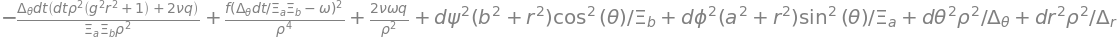

In [9]:
metric

In [10]:
nu_val = b * sympy.sin(theta) ** 2 * dphi + a * sympy.cos(theta) ** 2 * dpsi
nu_val

In [11]:
omega_val = a * sympy.sin(theta) ** 2 * dphi / xi_a + b * sympy.cos(theta) ** 2 * dpsi / xi_b
omega_val

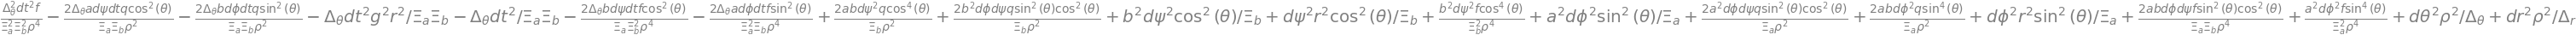

In [12]:
metric = metric.subs({nu: nu_val, omega: omega_val}).expand()
metric

Make the simplification $a = b$. In this case, $\Xi_a = \Xi_b = \Delta_\theta$.

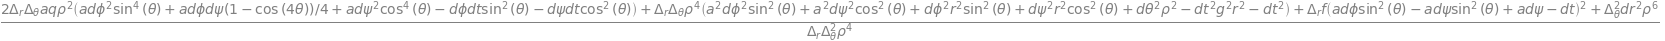

In [13]:
metric = metric.subs({b: a, xi_a: delta_theta, xi_b: delta_theta})
metric.simplify()

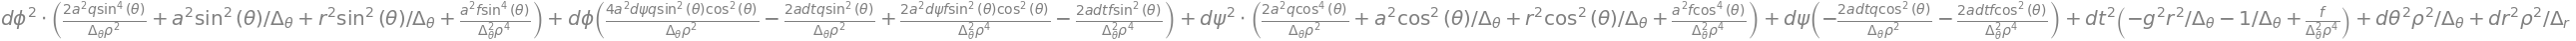

In [14]:
metric = metric.collect([dr, dphi, dpsi, dtheta, dt])
metric

Make the change of variables, $\tilde{\phi} = (\psi - \phi)/2$ and $\tilde{\psi} = (\phi + \psi)/2$, which means $\psi = \tilde{\phi} + \tilde{\psi}$ and $\phi = \tilde{\psi} - \tilde{\phi}$.

In [15]:
# keep the theta change of variable but don't use right now
phi_tilde, psi_tilde, theta_tilde = sympy.symbols("\\tilde{\phi} \\tilde{\psi} \\tilde{\\theta}")
dphi_tilde, dpsi_tilde, dtheta_tilde = sympy.symbols(r"d\tilde{\phi} d\tilde{\psi} d\tilde{\theta}")

In [16]:
dpsi_val = sympy.sin(theta) ** 2 * (dphi_tilde + dpsi_tilde) + 2 * sympy.sin(theta) * sympy.cos(theta) * dtheta * (phi_tilde + psi_tilde)
dphi_val = sympy.cos(theta) ** 2 * (dpsi_tilde - dphi_tilde) - 2 * sympy.sin(theta) * sympy.cos(theta) * dtheta * (psi_tilde - phi_tilde)

In [17]:
dpsi_val

In [18]:
dphi_val

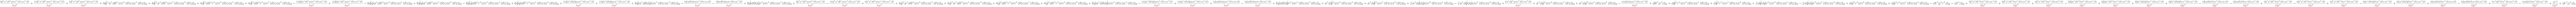

In [19]:
metric = metric.subs({dphi: dphi_val, dpsi: dpsi_val})
metric = metric.expand()
metric

With the simplification, the $\theta$ component is always positive definite and can be ignored.

In [20]:
metric_list_matrix = [[0 for i in range(4)] for i in range(4)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2)
metric_list_matrix[0][1] = metric.coeff(dt * dr)
metric_list_matrix[0][2] = metric.coeff(dt * dphi_tilde)
metric_list_matrix[0][3] = metric.coeff(dt * dpsi_tilde)

# dr
metric_list_matrix[1][0] = metric.coeff(dr * dt)
metric_list_matrix[1][1] = metric.coeff(dr ** 2)
metric_list_matrix[1][2] = metric.coeff(dr * dphi_tilde)
metric_list_matrix[1][3] = metric.coeff(dr * dpsi_tilde)

# dphi_tilde
metric_list_matrix[2][0] = metric.coeff(dphi_tilde * dt)
metric_list_matrix[2][1] = metric.coeff(dphi_tilde * dr)
metric_list_matrix[2][2] = metric.coeff(dphi_tilde ** 2)
metric_list_matrix[2][3] = metric.coeff(dphi_tilde * dpsi_tilde)

# dpsi_tilde
metric_list_matrix[3][0] = metric.coeff(dpsi_tilde * dt)
metric_list_matrix[3][1] = metric.coeff(dpsi_tilde * dr)
metric_list_matrix[3][2] = metric.coeff(dpsi_tilde * dphi_tilde)
metric_list_matrix[3][3] = metric.coeff(dpsi_tilde ** 2)

In [21]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡           2  2                                                              
⎢          g ⋅r       1          f                                            
⎢        - ────── - ────── + ──────────           0                           
⎢          Δₜₕₑₜₐ   Δₜₕₑₜₐ         2  4                                       
⎢                            Δₜₕₑₜₐ ⋅ρ                                        
⎢                                                                             
⎢                                                  2                          
⎢                                                 ρ                           
⎢                       0                         ──                          
⎢                                                 Δᵣ                          
⎢                                                                             
⎢                                                          2    4       2     
⎢                                                   

In [22]:
g_mat.simplify()
g_mat

⎡      2  2                                                                   
⎢     g ⋅r       1          f                                                 
⎢   - ────── - ────── + ──────────     0                   0                  
⎢     Δₜₕₑₜₐ   Δₜₕₑₜₐ         2  4                                            
⎢                       Δₜₕₑₜₐ ⋅ρ                                             
⎢                                                                             
⎢                                       2                                     
⎢                                      ρ                                      
⎢                 0                    ──                  0                  
⎢                                      Δᵣ                                     
⎢                                                                             
⎢                                                             ⎛ 2    2⎞       
⎢                                              (1 - 

### Admissibility Condition

Just look at $t$ and $\tilde{\psi}$ components.

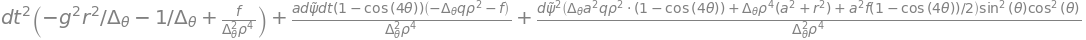

In [23]:
metric_t_tilde_psi = g_mat[0, 0] * dt ** 2 + g_mat[0, 3] * dt * dpsi_tilde * 2 + g_mat[3, 3] * dpsi_tilde ** 2
metric_t_tilde_psi

Make another change of coordinates.

In [24]:
angular_velocity, dpsi_prime = sympy.symbols("\Omega d\psi'")

In [25]:
dpsi_tilde_val = dpsi_prime - angular_velocity * dt
dpsi_tilde_val

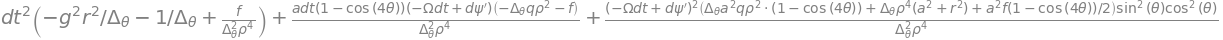

In [26]:
metric_t_psi_prime = metric_t_tilde_psi.subs({dpsi_tilde: dpsi_tilde_val})
metric_t_psi_prime

Perform a Wick rotation.

In [27]:
dtau = sympy.symbols("d\\tau")
dt_val = sympy.I * dtau

In [28]:
g_tt, g_t_psi_tilde, g_psi_tilde_square = sympy.symbols("g_{tt} g_{t\\tilde{\psi}} g_{\\tilde{\psi}\\tilde{\psi}}")

In [29]:
metric_t_psi_tilde_simp = g_tt * dt ** 2 + g_t_psi_tilde * dt * dpsi_tilde * 2 + g_psi_tilde_square * dpsi_tilde ** 2
metric_t_psi_tilde_simp

In [30]:
metric_tau_psi_tilde_simp = metric_t_psi_tilde_simp.subs({dpsi_tilde: dpsi_tilde_val}).subs({dt: dt_val})
metric_tau_psi_tilde_simp

In [31]:
metric_tau_psi_tilde_simp = metric_tau_psi_tilde_simp.expand().collect([dtau ** 2, dpsi_prime ** 2, dtau * dpsi_prime])
metric_tau_psi_tilde_simp

In [32]:
metric_list_matrix_2 = [[0 for i in range(2)] for i in range(2)]

# dtau
metric_list_matrix_2[0][0] = metric_tau_psi_tilde_simp.coeff(dtau ** 2)
metric_list_matrix_2[0][1] = metric_tau_psi_tilde_simp.coeff(dtau * dpsi_prime)

# dpsi_prime
metric_list_matrix_2[1][0] = metric_tau_psi_tilde_simp.coeff(dpsi_prime * dtau)
metric_list_matrix_2[1][1] = metric_tau_psi_tilde_simp.coeff(dpsi_prime ** 2)

In [33]:
g_mat_2 = sympy.Matrix(metric_list_matrix_2)
g_mat_2

⎡        2                                                                    
⎢- \Omega ⋅g_{\tilde{\psi}\tilde{\psi}} + 2⋅\Omega⋅g_{t\tilde{\psi}} - g_{tt} 
⎢                                                                             
⎣      -2⋅ⅈ⋅\Omega⋅g_{\tilde{\psi}\tilde{\psi}} + 2⋅ⅈ⋅g_{t\tilde{\psi}}       

                                                                 ⎤
 -2⋅ⅈ⋅\Omega⋅g_{\tilde{\psi}\tilde{\psi}} + 2⋅ⅈ⋅g_{t\tilde{\psi}}⎥
                                                                 ⎥
                   g_{\tilde{\psi}\tilde{\psi}}                  ⎦

In [34]:
g_mat_2.det().simplify()

### Supersymmetry

Introduce functions.

In [35]:
A_1, A_2, A_3, A_4, A_5, A_6, A_7 = sympy.symbols("A_1 A_2 A_3 A_4 A_5 A_6 A_7")

In [36]:
metric_list_matrix_2 = [[0 for i in range(3)] for i in range(3)]

# dt
metric_list_matrix_2[0][0] = A_1 * f + A_2
metric_list_matrix_2[0][2] = A_3 * f + A_4 * q

# dr
metric_list_matrix_2[1][1] = rho ** 2 / delta_r

# dpsi_tilde
metric_list_matrix_2[2][0] = A_3 * f + A_4 * q
metric_list_matrix_2[2][2] = A_5 * f + A_6 * q + A_7

In [37]:
g_mat_simp = sympy.Matrix(metric_list_matrix_2)
g_mat_simp

⎡ A₁⋅f + A₂   0     A₃⋅f + A₄⋅q   ⎤
⎢                                 ⎥
⎢              2                  ⎥
⎢             ρ                   ⎥
⎢     0       ──         0        ⎥
⎢             Δᵣ                  ⎥
⎢                                 ⎥
⎣A₃⋅f + A₄⋅q  0   A₅⋅f + A₆⋅q + A₇⎦

In [38]:
det_g = g_mat_simp.det()
det_g.factor()

Determine functions.

In [39]:
A_1_val = g_mat[0, 0].coeff(f)
A_2_val = (g_mat[0, 0] - A_1_val * f).simplify()

In [40]:
g_03 = g_mat[0, 3].expand().collect([f, q])
A_3_val = g_03.coeff(f).simplify()
A_4_val = g_03.coeff(q).simplify()

In [41]:
g_33 = g_mat[3, 3].expand().collect([f, q])
A_5_val = g_33.coeff(f).simplify()
A_6_val = g_33.coeff(q).simplify()
A_7_val = (g_33 - A_5_val * f - A_6_val * q).simplify()

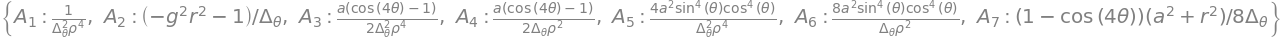

In [42]:
A_subs = {A_1: A_1_val, A_2: A_2_val, A_3: A_3_val, A_4: A_4_val, A_5: A_5_val, A_6: A_6_val, A_7: A_7_val}
A_subs

Set $g=1$.

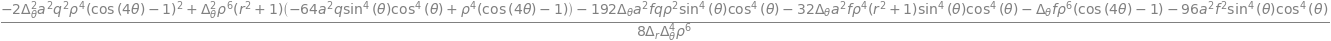

In [43]:
det_g_subs = det_g.subs(A_subs).subs({r ** 2 + a ** 2: rho ** 2, g: 1}).simplify()
det_g_subs

In [44]:
det_g_subs_num, det_g_subs_denom = sympy.fraction(det_g_subs)

In [45]:
det_g_subs_denom

In [46]:
det_g_subs_num

Introduce $f$.

In [47]:
f_val = 2 * m * rho ** 2 - q ** 2 + 2 * a ** 2 * q * g ** 2 * rho ** 2
f_val = f_val.subs({g: 1})
f_val

In [48]:
det_g_subs_num_simp = det_g_subs_num.subs({f: f_val}).simplify()
det_g_subs_num_simp

In [49]:
det_g_collect_q = det_g_subs_num_simp.expand().collect([q, q ** 2, q ** 3, q ** 4])
det_g_collect_q

In [50]:
q_coeff_val = det_g_collect_q.coeff(q)
q_coeff_val.factor()

In [51]:
q_2_coeff_val = det_g_collect_q.coeff(q ** 2)
q_2_coeff_val.factor()

In [52]:
q_3_coeff_val = det_g_collect_q.coeff(q ** 3)
q_3_coeff_val.factor()

In [53]:
q_4_coeff_val = det_g_collect_q.coeff(q ** 4)
q_4_coeff_val.factor()

In [54]:
q_0_coeff_val = (det_g_collect_q - q_coeff_val * q - q_2_coeff_val * q ** 2 - q_3_coeff_val * q ** 3 - q_4_coeff_val * q ** 4).simplify()
q_0_coeff_val

Introduce $\Delta_r$.

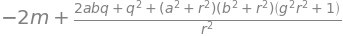

In [55]:
delta_r_val = ((r ** 2 + a ** 2) * (r ** 2 + b ** 2) * (1 + g ** 2 * r ** 2) + q ** 2 + 2 * a * b * q) / r ** 2 - 2 * m
delta_r_val

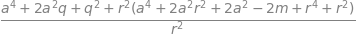

In [56]:
delta_r_simp = delta_r_val.subs({b: a, g: 1}).simplify().expand()
delta_r_simp = delta_r_simp.simplify()
delta_r_simp